In [9]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'store-sales-time-series-forecasting:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F29781%2F2887556%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T032934Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D35d079bbca2cbb3ffb767f01ae66dce94becf96dde2dfdc9c75b514ae8305783b92d30aaecb72a53b3cbf91564a73b2b601016fc61fa8e21fd63917bb1a574a170348685f3b180468db172885d4970c3f125820e92b5818c917acc8f1b18614d16464a7fb3b86f81f0dac77c5e77d0d942d6b6739768ed9da70ce581362ca1f82e916a853c3efa3e7baab07fe417ee1edf3bc98e1ae14ff9887cf7d025b1028ce07c4898b3904baff653ee4e08c465f4b32f5ab3e59d977108efd109cfe11216c70f22ce77dfe0edd6c06088521155ba42cd86fefd7fcdbf7a9218ed15420b0a9277c8a5fea2f84bf2108d8331d5a51b473a1793151c27b8c7dd45d76bc8a87e'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [12]:
oil_data = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/oil.csv")
holiday_data = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/holidays_events.csv", index_col='date',parse_dates=['date'])
store_data = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/stores.csv")

train_data = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/train.csv")
test_data = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/test.csv")
transaction_data = pd.read_csv("D:/Local Disk C/Python project/src/tugas sains data/sales data/transactions.csv")

sample = pd.read_csv('D:/Local Disk C/Python project/src/tugas sains data/sales data/sample_submission.csv')

In [13]:
store_data['store_nbr'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

# 1. EDA to Understand Dataset

In [14]:
# merge all available datasets for EDA (except holidays)

merge1 = pd.merge(train_data, oil_data, on='date', how='left')
merge2 = pd.merge(merge1, transaction_data, on=['date', 'store_nbr'], how='left')
merge3 = pd.merge(merge2, store_data, on='store_nbr', how='left')

merge3.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13


In [15]:
train_data['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [17]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   dcoilwtico    float64
 7   transactions  float64
 8   city          object 
 9   state         object 
 10  type          object 
 11  cluster       int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 274.7+ MB


In [18]:
# look at holidays dataset

holiday_data.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [19]:
# drop holidays that were transferred and those that aren't national holidays

holiday_data = holiday_data[holiday_data.transferred != True]
holiday_data = holiday_data[holiday_data.locale == 'National']

holiday_data = holiday_data.drop(columns=['type', 'locale', 'locale_name', 'transferred'])

In [20]:
# merge national holidays with merge3 to create df for EDA
merge3['date'] = pd.to_datetime(merge3['date'])
merge4 = pd.merge(merge3, holiday_data, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

df = merge4
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13,Primer dia del ano


In [21]:
# review new df

df.info()
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008016 entries, 0 to 3008015
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   dcoilwtico    float64       
 7   transactions  float64       
 8   city          object        
 9   state         object        
 10  type          object        
 11  cluster       int64         
 12  holiday       object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 298.3+ MB


,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster
count,3008016.00,3008016.00,3008016.00,3008016.00,3008016.00,2074248.00,2761935.00,3008016.00
mean,1501507.63,.2f,27.50,358.27,2.61,67.91,1695.50,8.48
min,0.00,.2f,1.00,0.00,0.00,26.19,5.00,1.00
25%,752003.75,.2f,14.00,0.00,0.00,46.39,1046.00,4.00
50%,1502225.50,.2f,27.50,11.00,0.00,53.36,1394.00,8.50
75%,2248883.25,.2f,41.00,196.00,0.00,95.78,2080.00,13.00
max,3000887.00,.2f,54.00,124717.00,741.00,110.62,8359.00,17.00
std,865730.31,nan,15.59,1103.51,12.26,25.66,964.18,4.65


In [22]:
# check for null values

df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       933768
transactions     246081
city                  0
state                 0
type                  0
cluster               0
holiday         2758536
dtype: int64

In [23]:
# fill null oil price values with interpolate method, and all others back/forward fill

def oil_nulls(x):
    if x.notnull().sum() > 1:
        return x.interpolate().ffill().bfill()
    else:
        return x.ffill().bfill()

df['dcoilwtico'] = oil_nulls(df['dcoilwtico'])
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico            0
transactions     246081
city                  0
state                 0
type                  0
cluster               0
holiday         2758536
dtype: int64

In [24]:
# write a function to create new columns for year, month, day, and day name

def date_features(x):
    x['date'] = pd.to_datetime(x['date'])

    x['year'] = x['date'].dt.year
    x['month'] = x['date'].dt.month
    x['day'] = x['date'].dt.day
    x['day_name'] = x['date'].dt.day_name()
    return x

df = date_features(df)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday


In [25]:
# let's take a sample of our data so that EDA goes more smoothly

df1 = df.sample(n=300000).reset_index()

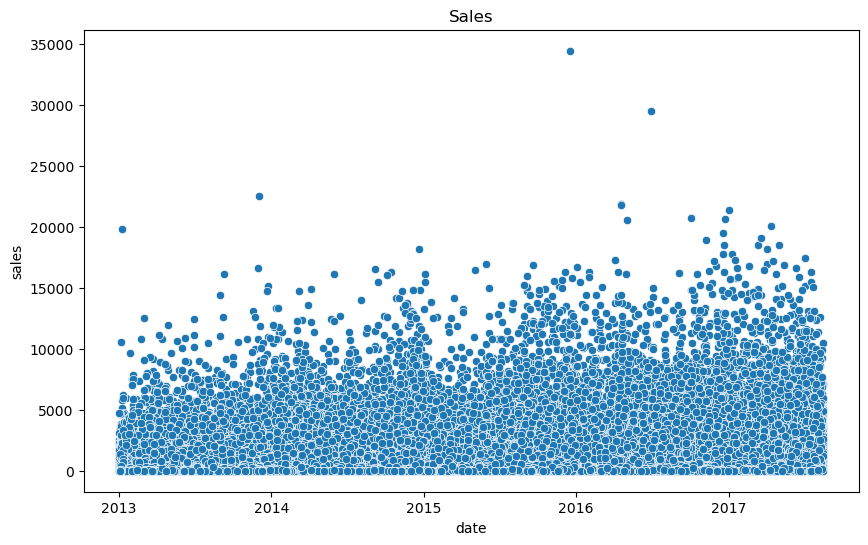

In [26]:
# checking scatter plot for outliers
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df1, x='date', y='sales')
ax.set_title('Sales')
plt.show()

In [27]:
df1.describe()

,index,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster,year,month,day
count,3.000000e+05,3.000000e+05,300000,300000.000000,300000.000000,300000.000000,300000.000000,275575.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.506027e+06,1.503520e+06,2015-04-26 02:02:53.952000256,27.478430,357.749409,2.615800,67.792361,1694.924532,8.482307,2014.843057,6.203503,15.606953
min,0.000000e+00,0.000000e+00,2013-01-01 00:00:00,1.000000,0.000000,0.000000,26.190000,5.000000,1.000000,2013.000000,1.000000,1.000000
25%,7.528958e+05,7.528958e+05,2014-02-28 00:00:00,14.000000,0.000000,0.000000,46.320000,1047.000000,4.000000,2014.000000,3.000000,8.000000
50%,1.507208e+06,1.505426e+06,2015-04-27 00:00:00,27.000000,11.000000,0.000000,53.240000,1394.000000,8.000000,2015.000000,6.000000,15.000000
75%,2.258148e+06,2.251020e+06,2016-06-20 00:00:00,41.000000,194.000000,0.000000,95.747436,2081.000000,13.000000,2016.000000,9.000000,23.000000
max,3.008006e+06,3.000878e+06,2017-08-15 00:00:00,54.000000,34454.000000,697.000000,110.620000,8359.000000,17.000000,2017.000000,12.000000,31.000000
std,8.690446e+05,8.664331e+05,NaN,15.581861,1092.631619,12.297877,25.682155,962.146238,4.651534,1.345632,3.384673,8.805449


In [28]:
# getting rid of outliers in original df

for i in range(1,len(df.store_nbr.unique())+1):
    val = df[df.store_nbr == i].sales.quantile(0.99)
    df = df.drop(df[(df.store_nbr==i) & (df.sales > val)].index)

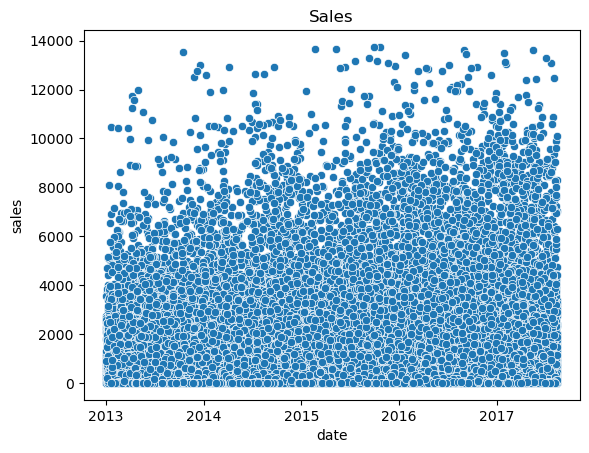

In [29]:
# checking scatter plot for outliers again

df1 = df.sample(n=300000).reset_index()

ax = sns.scatterplot(data=df1, x='date', y='sales')
ax.set_title('Sales')
plt.show()

In [30]:
df_lain = df1[['month','sales']]
df_lain.head()

,month,sales
0,8,238.000
1,4,1745.997
2,12,0.000
3,5,89.000
4,7,0.000


In [31]:
df1[df1['sales']==997.441]

,index,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name


In [32]:
df_lain[df_lain['month']==1].mean()

month      1.000000
sales    293.043721
dtype: float64

Rata2

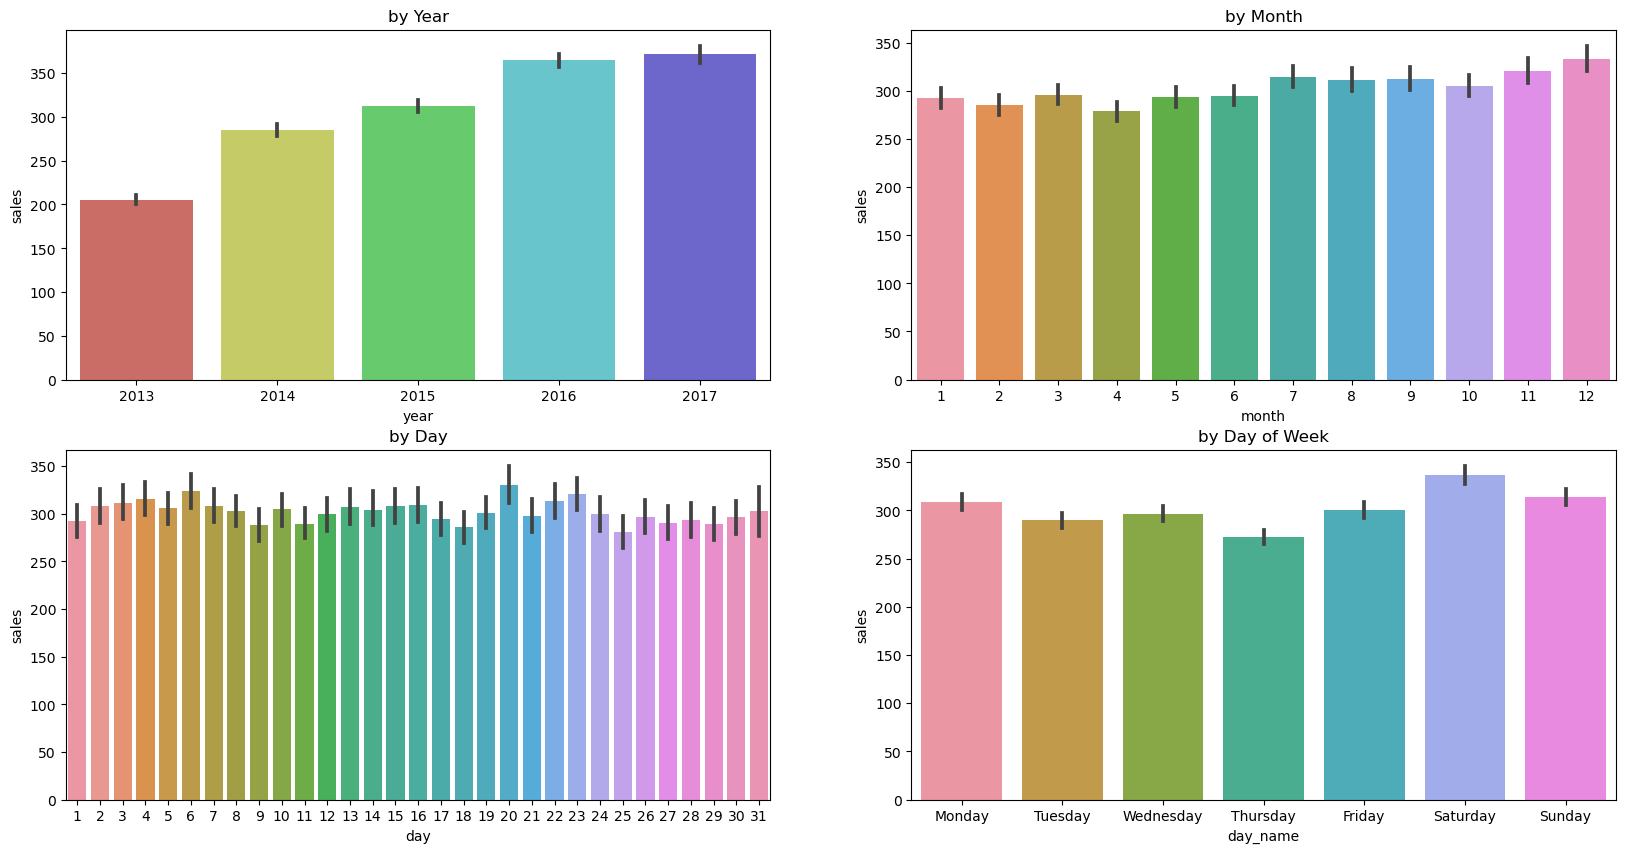

In [33]:
# viewing sales data

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.set_palette('hls')
fig, axs = plt.subplots(2, 2, figsize=(20,10))

sns.barplot(x='year', y='sales', data=df1, ax=axs[0,0])
sns.barplot(x='month', y='sales', data=df1, ax=axs[0,1])
sns.barplot(x='day', y='sales', data=df1, ax=axs[1,0])
sns.barplot(x='day_name', y='sales', data=df1, ax=axs[1,1], order=order)

axs[0,0].set_title('by Year')
axs[0,1].set_title('by Month')
axs[1,0].set_title('by Day')
axs[1,1].set_title('by Day of Week')
plt.show()

#### Observations:

1. Sales have been steadily increasing from 2013 to 2017
2. Sales are higher in December
3. Sales are higher towards the beginning of the  month
4. Sales are higher on weekends

We will use this information for feature engineering later

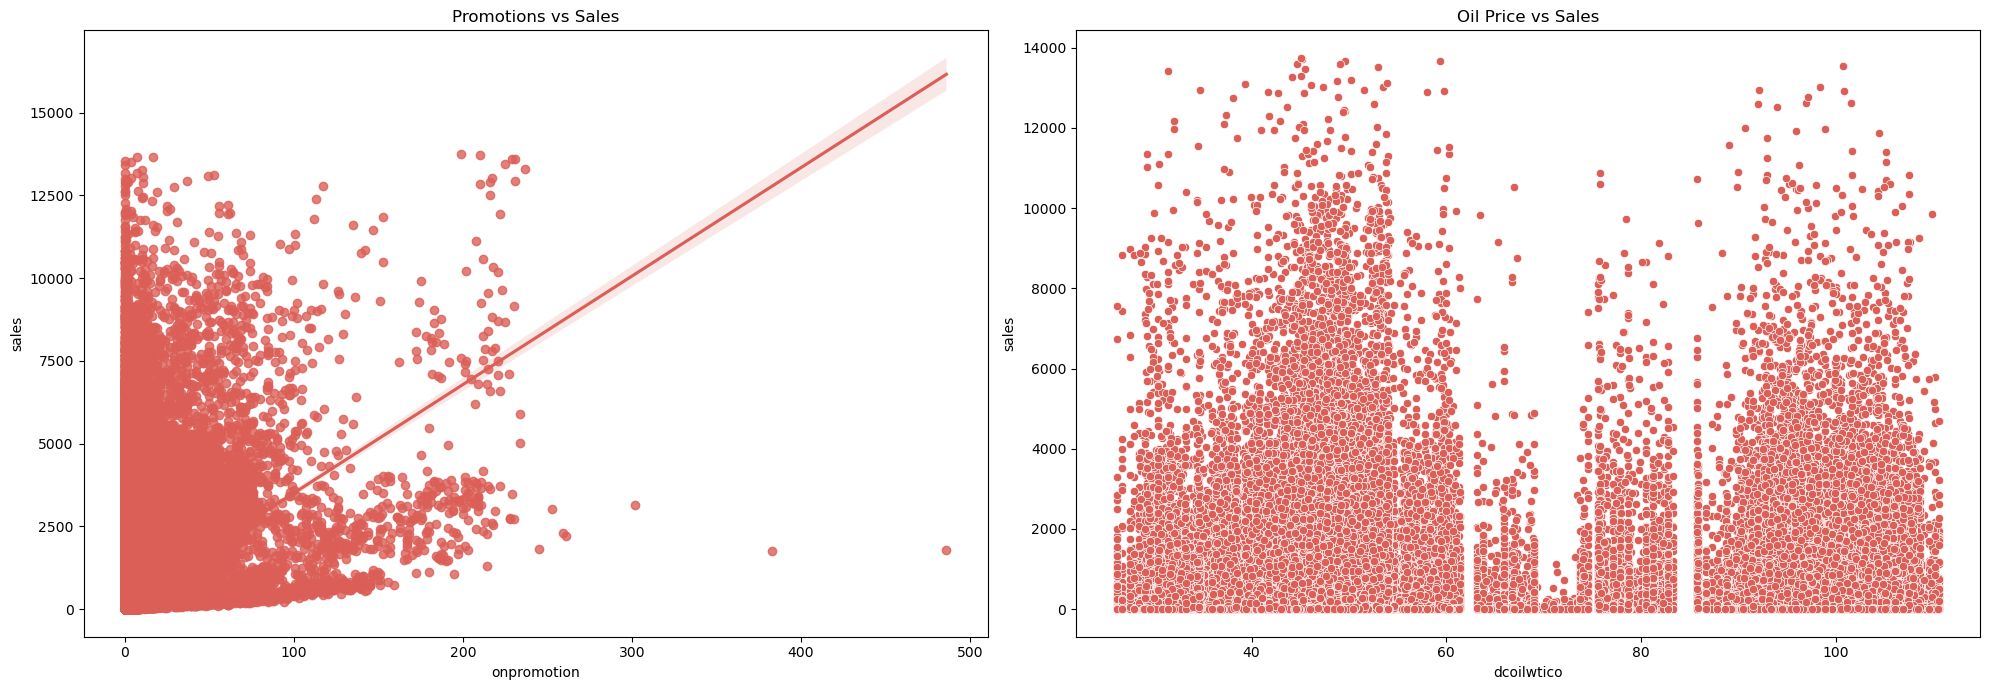

In [34]:
# let's see the effect promotions and oil prices have on sales

fig, axs = plt.subplots(1, 2, figsize=(20,7))

sns.regplot(data=df1, x='onpromotion', y='sales', ax=axs[0])
ax = sns.scatterplot(data=df1, x='dcoilwtico', y='sales', ax=axs[1])

axs[0].set_title('Promotions vs Sales')
axs[1].set_title('Oil Price vs Sales')

plt.tight_layout()
plt.show()

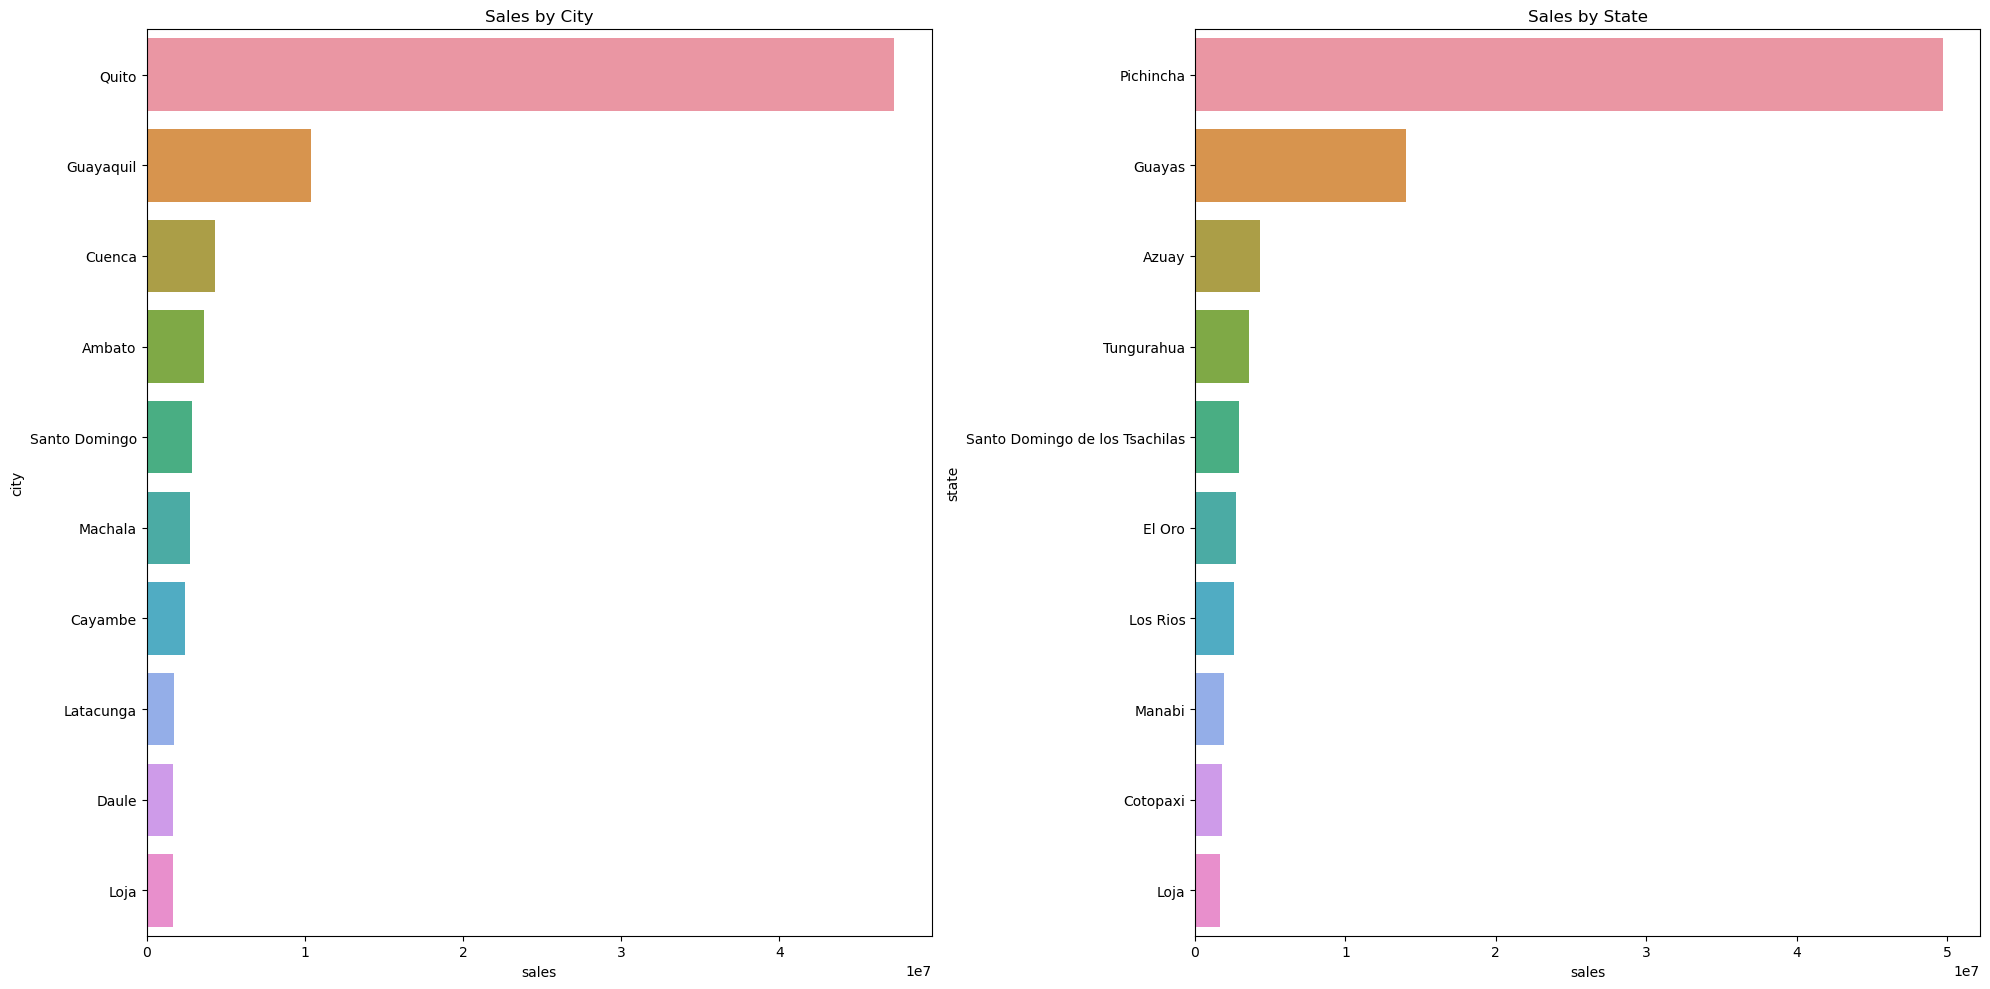

In [35]:
# let's see which cities are selling the most

fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(x='sales', y='city', data=df1.groupby('city')['sales'].sum().reset_index().sort_values('sales', ascending = False).head(10), ax=axs[0])
sns.barplot(x='sales', y='state', data=df1.groupby('state')['sales'].sum().reset_index().sort_values('sales', ascending = False).head(10), ax=axs[1])

axs[0].set_title('Sales by City')
axs[1].set_title('Sales by State')

plt.tight_layout()
plt.show()

In [36]:
# let's check out the product families and see if we can consolidate them a bit

np.sort(df.family.unique())

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [52]:
# how is the product family

# first evaluate by sum of sales

familypivot = pd.DataFrame()
familypivot = df.groupby(by='family')['sales'].sum().sort_values(ascending=False).reset_index()
familypivot.head()

# then evaluate by percentage of sales

total = familypivot['sales'].sum()
familypivot['percentage']=(familypivot['sales']/total)

familypivot.head()

,family,sales,percentage
0,GROCERY I,2.198273e+08,0.244178
1,BEVERAGES,1.843857e+08,0.204811
2,PRODUCE,1.055710e+08,0.117265
3,CLEANING,9.715241e+07,0.107914
4,DAIRY,6.462747e+07,0.071786


In [54]:
family_pivot_plot = familypivot.groupby('family')['sales'].sum().reset_index().sort_values('sales', ascending = False).head(10)
family_pivot_plot1 = familypivot.groupby('family')['percentage'].sum().reset_index().sort_values('percentage', ascending = False).head(10)

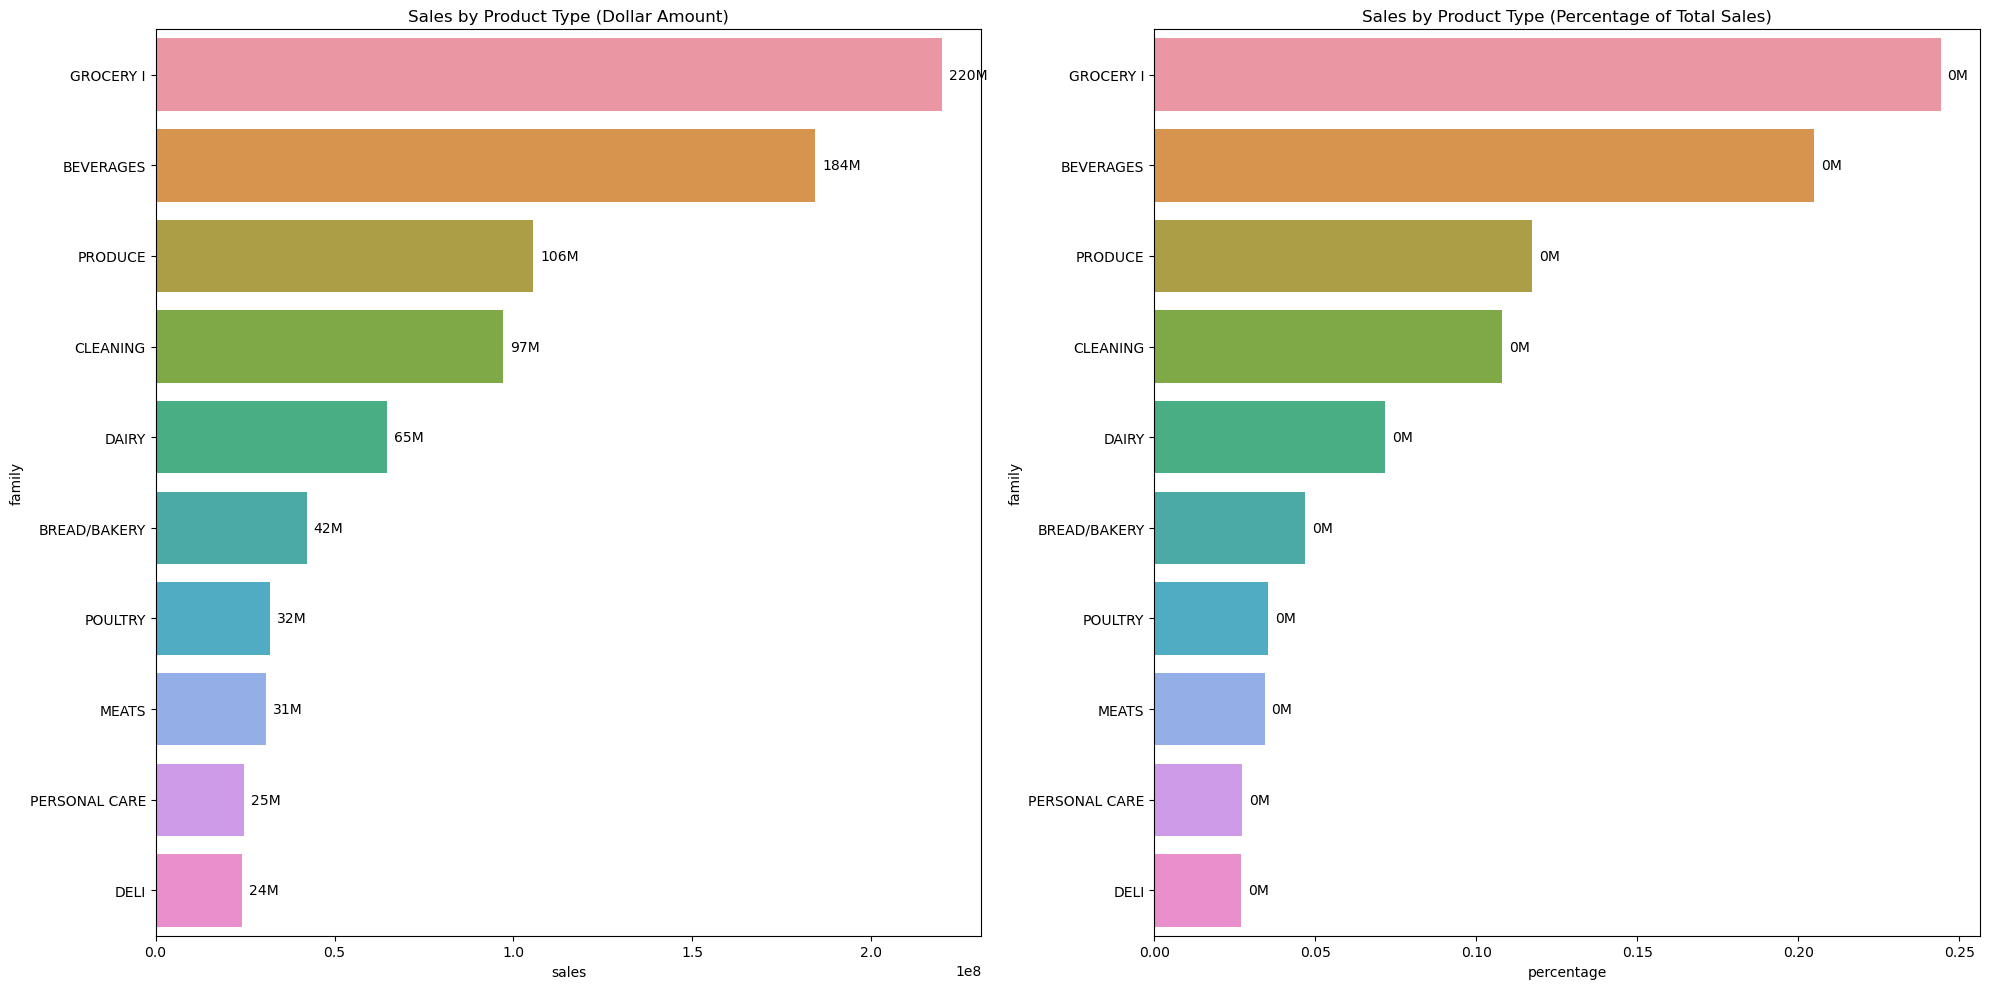

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Create the bar plots
sns.barplot(data=family_pivot_plot, x='sales', y='family', ax=axs[0])
sns.barplot(data=family_pivot_plot1, x='percentage', y='family', ax=axs[1])

# Set titles for the subplots
axs[0].set_title('Sales by Product Type (Dollar Amount)')
axs[1].set_title('Sales by Product Type (Percentage of Total Sales)')

# Annotate the bars with percentages
for ax in axs:
    for p in ax.patches:
        # Get the value from the bar
        value = p.get_width()
        # Add the percentage annotation
        ax.annotate(f'{value/1000000:.0f}M', 
                    xy=(value, p.get_y() + p.get_height() / 2),
                    xytext=(5, 0),  # Offset for text position
                    textcoords="offset points",
                    ha='left', va='center')

plt.tight_layout()
plt.show()


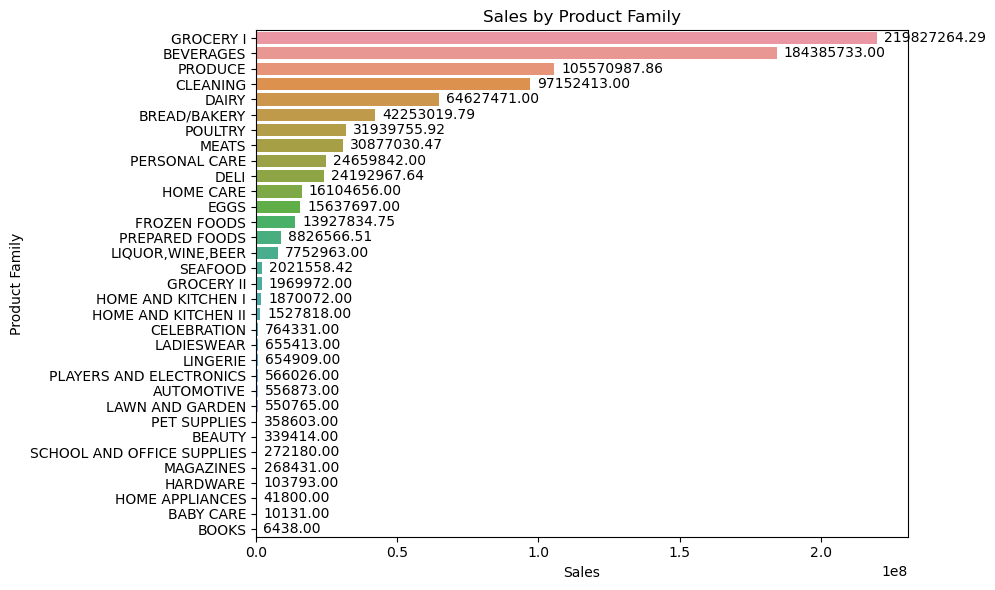

In [39]:

# Create a bar plot for sales
plt.figure(figsize=(10, 6))
sns.barplot(data=familypivot, x='sales', y='family')

# Annotate the bars with sales values
for p in plt.gca().patches:
    value = p.get_width()
    plt.annotate(f'{value:.2f}', 
                 xy=(value, p.get_y() + p.get_height() / 2),
                 xytext=(5, 0),  # Offset for text position
                 textcoords="offset points",
                 ha='left', va='center')

# Set labels and title
plt.xlabel('Sales')
plt.ylabel('Product Family')
plt.title('Sales by Product Family')

plt.tight_layout()
plt.show()


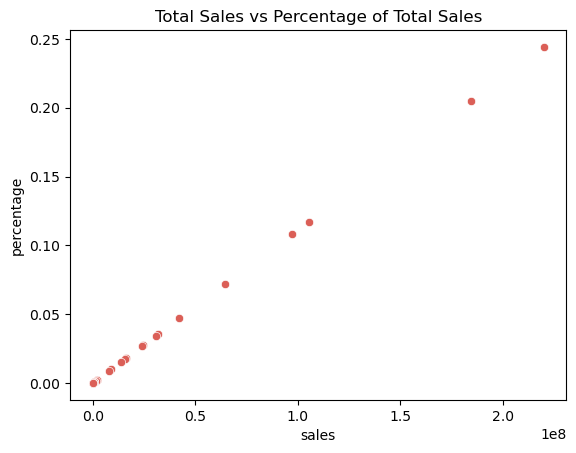

In [40]:
ax = sns.scatterplot(data=familypivot, x='sales', y='percentage')
ax.set_title('Total Sales vs Percentage of Total Sales')

plt.show()

In [41]:
family_map       = {'AUTOMOTIVE': 'rest',
                   'BABY CARE': 'rest',
                   'BEAUTY': 'rest',
                   'BOOKS': 'rest',
                   'CELEBRATION': 'rest',
                   'GROCERY II': 'rest',
                   'HARDWARE': 'rest',
                   'HOME AND KITCHEN I': 'rest',
                   'HOME AND KITCHEN II': 'rest',
                   'HOME APPLIANCES': 'rest',
                   'LADIESWEAR': 'rest',
                   'LAWN AND GARDEN': 'rest',
                   'LINGERIE': 'rest',
                   'MAGAZINES': 'rest',
                   'PET SUPPLIES': 'rest',
                   'PLAYERS AND ELECTRONICS': 'rest',
                   'SCHOOL AND OFFICE SUPPLIES': 'rest',
                   'SEAFOOD': 'rest',
                   'DELI': 'fifth',
                    'EGGS': 'sixth',
                    'FROZEN FOODS': 'sixth',
                    'HOME CARE': 'sixth',
                    'LIQUOR,WINE,BEER': 'sixth',
                    'PREPARED FOODS': 'sixth',
                    'PERSONAL CARE': 'fifth',
                    'BREAD/BAKERY': 'fourth',
                    'MEATS': 'fifth',
                    'POULTRY': 'third',
                    'CLEANING':'third',
                    'DAIRY':'fourth',
                    'PRODUCE':'third',
                    'BEVERAGES':'second',
                    'GROCERY I': 'first'
                   }

df['new_family'] = df['family'].map(family_map)
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [42]:
# dropping the old family column because we don't need it anymore

df2 = df.drop(columns=['family'])
df2.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,Primer dia del ano,2013,1,1,Tuesday,rest


In [43]:
# replace holiday column values with "yes" if there is a national holiday

def replace_non_null(x):
    x.loc[x['holiday'].notnull(), 'holiday'] = 'yes'
    return x

df2 = replace_non_null(df2)

In [44]:
df2.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest


In [45]:
df2['city'].unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [46]:
df2_oil = df2[['date', 'dcoilwtico', 'sales']]

In [47]:
df2_oil = df2_oil.set_index('date')
df2_oil = df2_oil.resample('1D').sum()
df2_oil.reset_index()

,date,dcoilwtico,sales
0,2013-01-01,165975.480000,2511.618999
1,2013-01-02,164671.520000,425067.417944
2,2013-01-03,165579.570000,358604.231124
3,2013-01-04,165939.840000,354459.677093
4,2013-01-05,165044.081952,425603.121229
...,...,...,...
1683,2017-08-11,85368.690000,686541.367022
1684,2017-08-12,84931.973955,666668.772079
1685,2017-08-13,83482.671184,666367.882471
1686,2017-08-14,83710.810000,658090.939081


In [48]:
oil_data['dcoilwtico'] = np.where(oil_data['dcoilwtico']==0, np.nan, oil_data['dcoilwtico'])
oil_data['interpolated_price'] = oil_data.dcoilwtico.interpolate()

In [49]:
oil_data = oil_data.drop('dcoilwtico',axis=1)

In [50]:
oil_data['price_chg'] = oil_data.interpolated_price - oil_data.interpolated_price.shift(1)
oil_data['pct_chg'] = oil_data['price_chg']/oil_data.interpolated_price.shift(-1)

In [ ]:
fig,ax = plt.subplots(figsize=(18, 7))
plt.plot(oil_data['interpolated_price'])
plt.title('Oil Price over time')

plt.show()

# 2. Predictive Analysis

In [13]:
df3 = df2.copy()

In [38]:
# cats = df3.select_dtypes(exclude=np.number).columns.tolist()

# for col in cats:
#     df3[col] = df3[col].astype('category')

# df3.dtypes

In [14]:
#Manual encoding
df3['holiday'] = df3['holiday'].replace('yes', 1).replace('no', 0)
df3['type'] = df3['type'].replace('A', 1).replace('B', 2).replace('C', 3).replace('D', 4).replace('E', 5)
df3['new_family'] = df3['new_family'].replace('first', 1).replace('second', 2).replace('third', 3).replace('fourth', 4).replace('fifth', 5).replace('sixth', 6).replace('rest', 7)

In [15]:
df3.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,4,13,1.0,2013,1,1,Tuesday,7
1,1,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,4,13,1.0,2013,1,1,Tuesday,7
2,2,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,4,13,1.0,2013,1,1,Tuesday,7
3,3,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,4,13,1.0,2013,1,1,Tuesday,2
4,4,2013-01-01,1,0.0,0,93.14,NaN,Quito,Pichincha,4,13,1.0,2013,1,1,Tuesday,7


In [79]:
df2.isnull().sum()

id                    0
date                  0
store_nbr             0
sales                 0
onpromotion           0
dcoilwtico            0
transactions     245924
city                  0
state                 0
type                  0
cluster               0
holiday         2732599
year                  0
month                 0
day                   0
day_name              0
new_family            0
dtype: int64

In [16]:
train_percent = 0.8
df3.shape[0]*train_percent

2382316.0

In [17]:
train = df3.loc[:df3.shape[0]*train_percent]
test = df3.loc[df3.shape[0]*train_percent:]

In [118]:
train.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'dcoilwtico',
       'transactions', 'city', 'state', 'type', 'cluster', 'holiday', 'year',
       'month', 'day', 'day_name', 'new_family', 'city_Ambato',
       'city_Babahoyo', 'city_Cayambe', 'city_Cuenca', 'city_Daule',
       'city_El Carmen', 'city_Esmeraldas', 'city_Guaranda', 'city_Guayaquil',
       'city_Ibarra', 'city_Latacunga', 'city_Libertad', 'city_Loja',
       'city_Machala', 'city_Manta', 'city_Playas', 'city_Puyo',
       'city_Quevedo', 'city_Quito', 'city_Riobamba', 'city_Salinas',
       'city_Santo Domingo', 'state_Azuay', 'state_Bolivar',
       'state_Chimborazo', 'state_Cotopaxi', 'state_El Oro',
       'state_Esmeraldas', 'state_Guayas', 'state_Imbabura', 'state_Loja',
       'state_Los Rios', 'state_Manabi', 'state_Pastaza', 'state_Pichincha',
       'state_Santa Elena', 'state_Santo Domingo de los Tsachilas',
       'state_Tungurahua', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday'

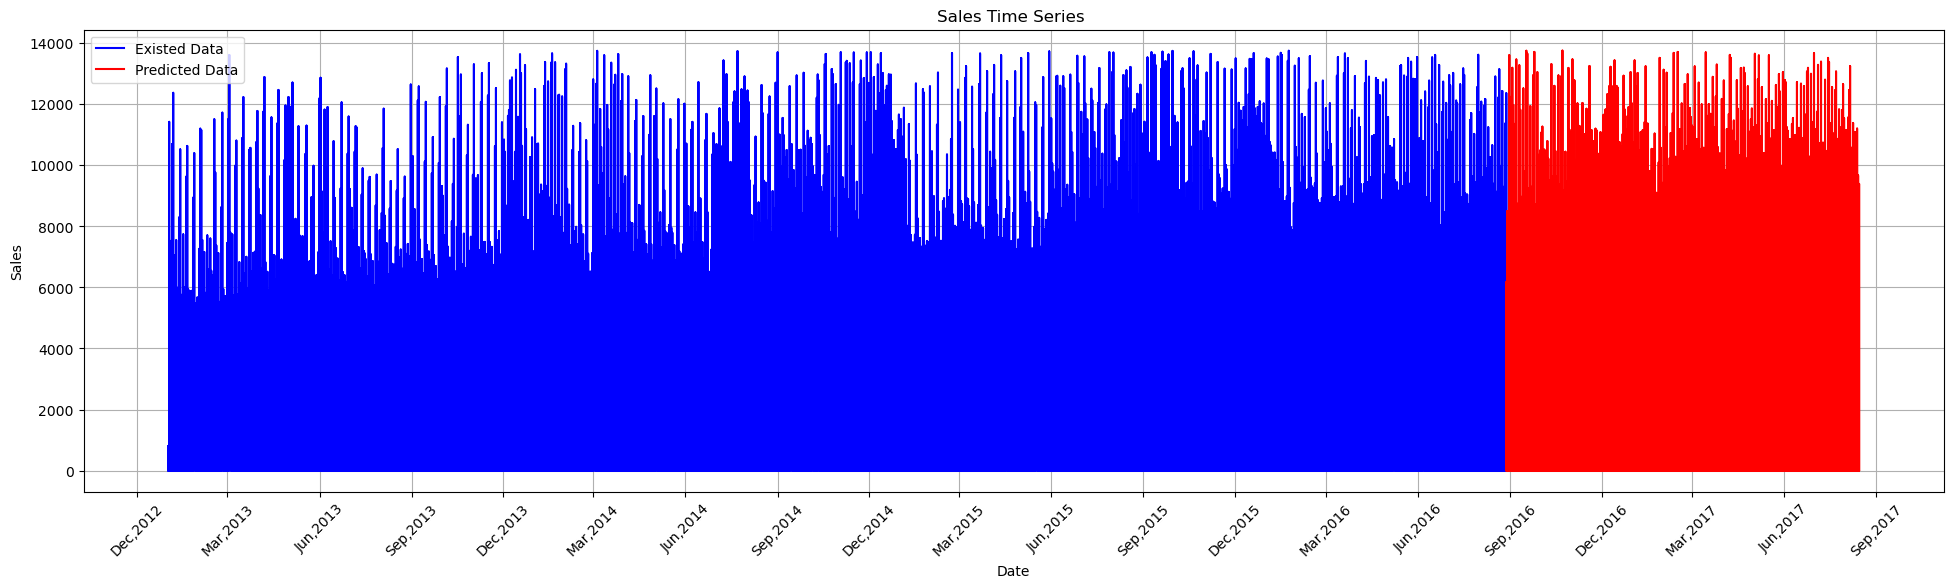

In [95]:
import matplotlib.dates as mdates

# Create the time series plot
fig, ax = plt.subplots(figsize=(24,3))
# Plot df_result
ax.plot(train['date'], train['sales'], color='blue', label='Existed Data')
# Plot df_result2 with a different color
ax.plot(test['date'], test['sales'], color='red', label='Predicted Data')
# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))
# Set the locator to place a tick on each month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month
# Rotate the date labels for better readability
plt.xticks(rotation=45)
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series ')
# Add grid, legend, and show the plot
plt.grid(True)
plt.legend()
plt.show()


In [97]:
test.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
2382316,2375188,2016-08-28,52,0.0,0,47.010971,NaN,Manta,Manabi,1,11,NaN,2016,8,28,Sunday,7
2382317,2375189,2016-08-28,52,0.0,0,47.010783,NaN,Manta,Manabi,1,11,NaN,2016,8,28,Sunday,7
2382318,2375190,2016-08-28,52,0.0,0,47.010595,NaN,Manta,Manabi,1,11,NaN,2016,8,28,Sunday,7
2382319,2375191,2016-08-28,52,0.0,0,47.010407,NaN,Manta,Manabi,1,11,NaN,2016,8,28,Sunday,7
2382320,2375192,2016-08-28,52,0.0,0,47.010219,NaN,Manta,Manabi,1,11,NaN,2016,8,28,Sunday,7


In [161]:
df3.shape[0]/2

1488947.5

In [18]:
df3_1 = df3.loc[:df3.shape[0]/2]
df3_2 = df3.loc[df3.shape[0]/2:]

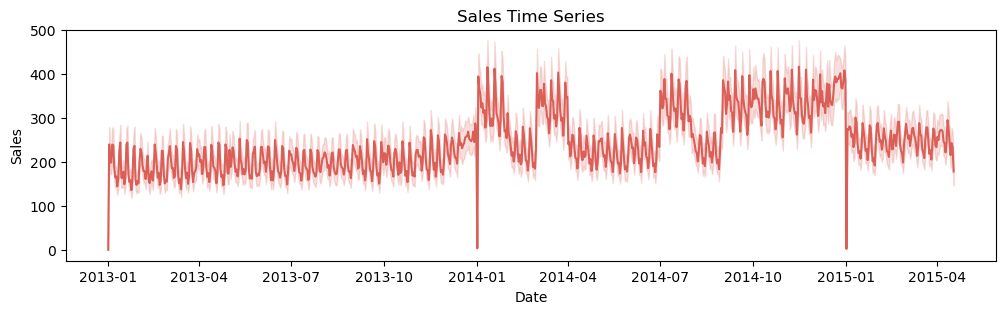

In [130]:
fig, axs = plt.subplots(figsize=(12, 3))
sns.lineplot(data=df3_1, x='date', y='sales')
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


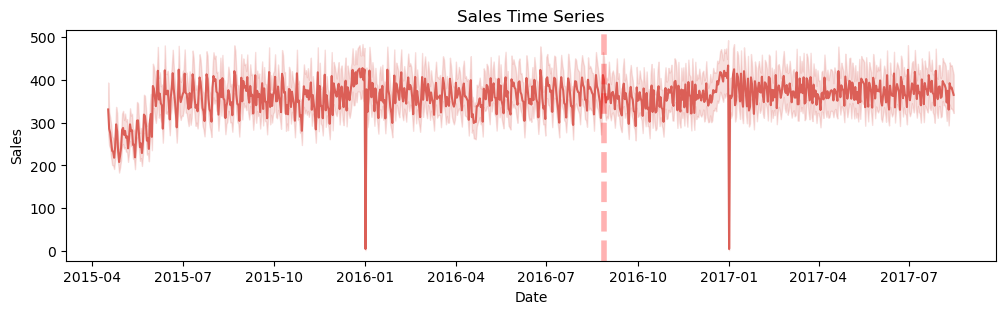

In [129]:
fig, axs = plt.subplots(figsize=(12, 3))
sns.lineplot(data=df3_2, x='date', y='sales')
plt.title('Sales Time Series')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month
plt.axvline(x=pd.Timestamp('2016-08-28'),color='b',linestyle='--',linewidth=4,alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



In [19]:
hot = ['city', 'state', 'day_name'] 
# One-hot encoding
for cat in hot:
    onehots = pd.get_dummies(df3[cat], prefix=cat)
    df3 = df3.join(onehots)

# Drop original columns
encode_data = df3.drop(columns=hot).copy()

# Fill NaN values with 0
encode_data.fillna(0, inplace=True)
bool_cols = encode_data.select_dtypes(include='bool').columns.tolist()
encode_data[bool_cols] = encode_data[bool_cols].astype(float)


In [164]:
encode_data.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,type,cluster,holiday,...,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
import plotly.express as px
hm = encode_data.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='ice',
                template='plotly_dark',width=900,height=900)
fig.show()

Mulai Buat Model

In [165]:
encode_data.shape

(2977895, 59)

In [166]:
encode_data.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'dcoilwtico',
       'transactions', 'type', 'cluster', 'holiday', 'year', 'month', 'day',
       'new_family', 'city_Ambato', 'city_Babahoyo', 'city_Cayambe',
       'city_Cuenca', 'city_Daule', 'city_El Carmen', 'city_Esmeraldas',
       'city_Guaranda', 'city_Guayaquil', 'city_Ibarra', 'city_Latacunga',
       'city_Libertad', 'city_Loja', 'city_Machala', 'city_Manta',
       'city_Playas', 'city_Puyo', 'city_Quevedo', 'city_Quito',
       'city_Riobamba', 'city_Salinas', 'city_Santo Domingo', 'state_Azuay',
       'state_Bolivar', 'state_Chimborazo', 'state_Cotopaxi', 'state_El Oro',
       'state_Esmeraldas', 'state_Guayas', 'state_Imbabura', 'state_Loja',
       'state_Los Rios', 'state_Manabi', 'state_Pastaza', 'state_Pichincha',
       'state_Santa Elena', 'state_Santo Domingo de los Tsachilas',
       'state_Tungurahua', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thurs

In [20]:
def create_features(df):
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    #df['weekofyear'] = df['date'].dt.weekofyear
    return df

encode_data = create_features(encode_data)

In [21]:
train = encode_data.loc[:encode_data.shape[0]*train_percent]
test = encode_data.loc[encode_data.shape[0]*train_percent:]

In [170]:
with pd.option_context('display.max_rows', 20, 'display.max_columns', None):
    display(encode_data.head())

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,type,cluster,holiday,year,month,day,new_family,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,state_Azuay,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Esmeraldas,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,dayofyear,dayofmonth
0,0,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,2013,1,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,1,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,2013,1,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,2013,1,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,3,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,2013,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,4,2013-01-01,1,0.0,0,93.14,0.0,4,13,1.0,2013,1,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1


In [22]:
encode_data.set_index('id')

,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,type,cluster,holiday,year,...,state_Tungurahua,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,dayofyear,dayofmonth
id,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,0.000,0,93.14,0.0,4,13,1.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,2013-01-01,1,0.000,0,93.14,0.0,4,13,1.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
2,2013-01-01,1,0.000,0,93.14,0.0,4,13,1.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
3,2013-01-01,1,0.000,0,93.14,0.0,4,13,1.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
4,2013-01-01,1,0.000,0,93.14,0.0,4,13,1.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,438.133,0,47.57,2155.0,2,6,0.0,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,227,15
3000884,2017-08-15,9,154.553,1,47.57,2155.0,2,6,0.0,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,227,15
3000885,2017-08-15,9,2419.729,148,47.57,2155.0,2,6,0.0,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,227,15


In [180]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977895 entries, 0 to 3008015
Data columns (total 61 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   id                                    int64         
 1   date                                  datetime64[ns]
 2   store_nbr                             int64         
 3   sales                                 float64       
 4   onpromotion                           int64         
 5   dcoilwtico                            float64       
 6   transactions                          float64       
 7   type                                  int64         
 8   cluster                               int64         
 9   holiday                               float64       
 10  year                                  int32         
 11  month                                 int32         
 12  day                                   int32         
 13  new_family       

In [23]:
train = create_features(train)
test = create_features(test)
#date not become feature
FEATURES = ['id','store_nbr', 'onpromotion', 'dcoilwtico',
       'transactions', 'type', 'cluster', 'holiday', 'year', 'month', 'day',
       'new_family', 'city_Ambato', 'city_Babahoyo', 'city_Cayambe',
       'city_Cuenca', 'city_Daule', 'city_El Carmen', 'city_Esmeraldas',
       'city_Guaranda', 'city_Guayaquil', 'city_Ibarra', 'city_Latacunga',
       'city_Libertad', 'city_Loja', 'city_Machala', 'city_Manta',
       'city_Playas', 'city_Puyo', 'city_Quevedo', 'city_Quito',
       'city_Riobamba', 'city_Salinas', 'city_Santo Domingo', 'state_Azuay',
       'state_Bolivar', 'state_Chimborazo', 'state_Cotopaxi', 'state_El Oro',
       'state_Esmeraldas', 'state_Guayas', 'state_Imbabura', 'state_Loja',
       'state_Los Rios', 'state_Manabi', 'state_Pastaza', 'state_Pichincha',
       'state_Santa Elena', 'state_Santo Domingo de los Tsachilas',
       'state_Tungurahua', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday', 'dayofyear', 'dayofmonth']
TARGET = 'sales'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [24]:
import xgboost as xgb

In [182]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:884.07693	validation_1-rmse:1059.53564
[100]	validation_0-rmse:525.06812	validation_1-rmse:679.20512
[200]	validation_0-rmse:422.06189	validation_1-rmse:531.84363
[300]	validation_0-rmse:383.45424	validation_1-rmse:466.71583
[400]	validation_0-rmse:365.93196	validation_1-rmse:436.11571
[500]	validation_0-rmse:354.76784	validation_1-rmse:416.51628
[600]	validation_0-rmse:347.97938	validation_1-rmse:407.59962
[700]	validation_0-rmse:343.67764	validation_1-rmse:403.12612
[800]	validation_0-rmse:340.89864	validation_1-rmse:399.83763
[900]	validation_0-rmse:338.61459	validation_1-rmse:397.35047
[999]	validation_0-rmse:336.53932	validation_1-rmse:395.10777


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Feature importance

<Figure size 1000x2400 with 0 Axes>

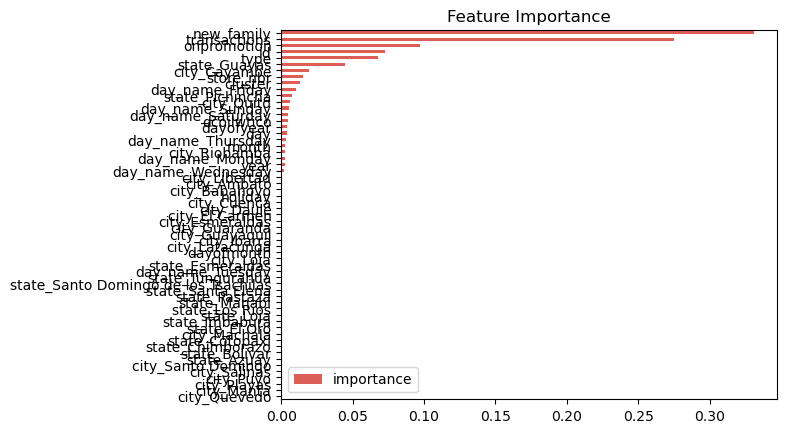

In [186]:
plt.figure(figsize=(10,24))
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Forecasting data test

In [243]:
test['sales prediction'] = reg.predict(X_test)
#test_data = test_data.merge(test[['prediction']], how='left', left_index=True, right_index=True)
test_1 = test.loc[:test.shape[0]/2]
test_2 = test.loc[test.shape[0]/2:]


In [244]:
test.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,type,cluster,holiday,...,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,dayofyear,dayofmonth,sales prediction,Cumulative Sales,Cumulative Sales Prediction
2382316,2375188,2016-08-28,52,0.0,0,47.010971,0.0,1,11,0.0,...,0.0,1.0,0.0,0.0,0.0,241,28,-5.085444,0.0,-5.085444
2382317,2375189,2016-08-28,52,0.0,0,47.010783,0.0,1,11,0.0,...,0.0,1.0,0.0,0.0,0.0,241,28,-5.085444,0.0,-10.170889
2382318,2375190,2016-08-28,52,0.0,0,47.010595,0.0,1,11,0.0,...,0.0,1.0,0.0,0.0,0.0,241,28,-5.085444,0.0,-15.256333
2382319,2375191,2016-08-28,52,0.0,0,47.010407,0.0,1,11,0.0,...,0.0,1.0,0.0,0.0,0.0,241,28,-5.085444,0.0,-20.341778
2382320,2375192,2016-08-28,52,0.0,0,47.010219,0.0,1,11,0.0,...,0.0,1.0,0.0,0.0,0.0,241,28,-5.085444,0.0,-25.427223


In [237]:
test_result1 = test.groupby('date', as_index = False )['sales'].sum()
test_result2 = test.groupby('date', as_index = False )['sales prediction'].sum()
test_result = pd.merge(test_result1, test_result2, on='date', how='left')

In [242]:
test_result.head()

,date,sales,sales prediction
0,2016-08-28,90399.183989,75551.289062
1,2016-08-29,652858.137816,642056.750000
2,2016-08-30,618149.944056,641858.750000
3,2016-08-31,634496.909045,688662.500000
4,2016-09-01,624565.157925,632774.750000


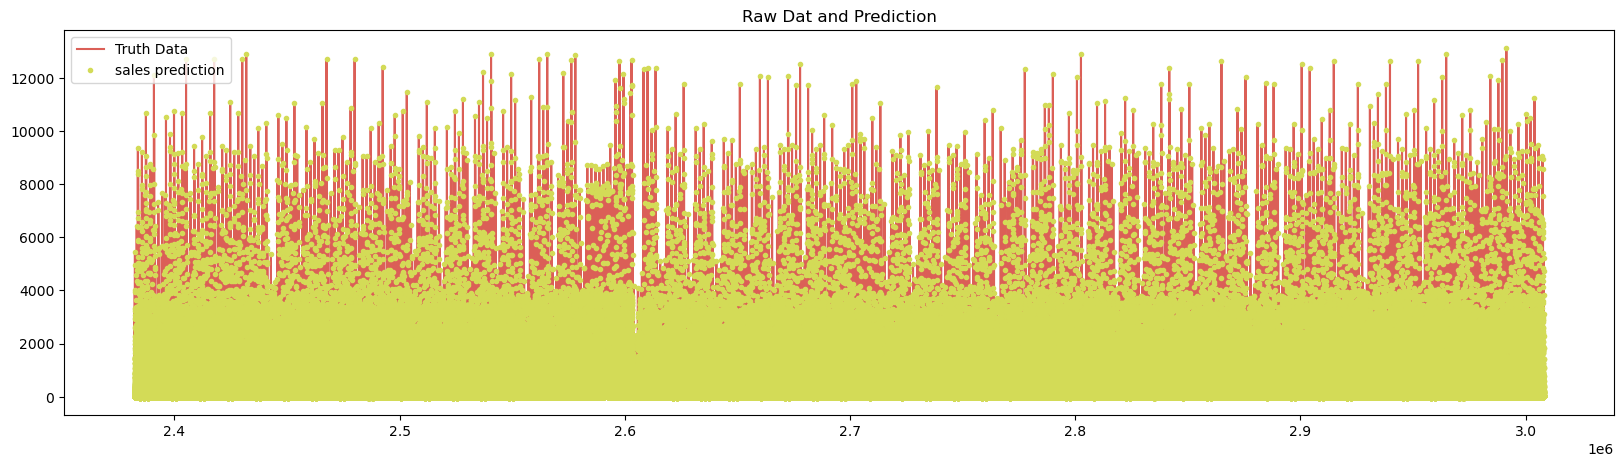

In [194]:
ax = test[['sales prediction']].plot(figsize=(20, 5))
test['sales prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'sales prediction'])
ax.set_title('Raw Dat and Prediction')
plt.show()

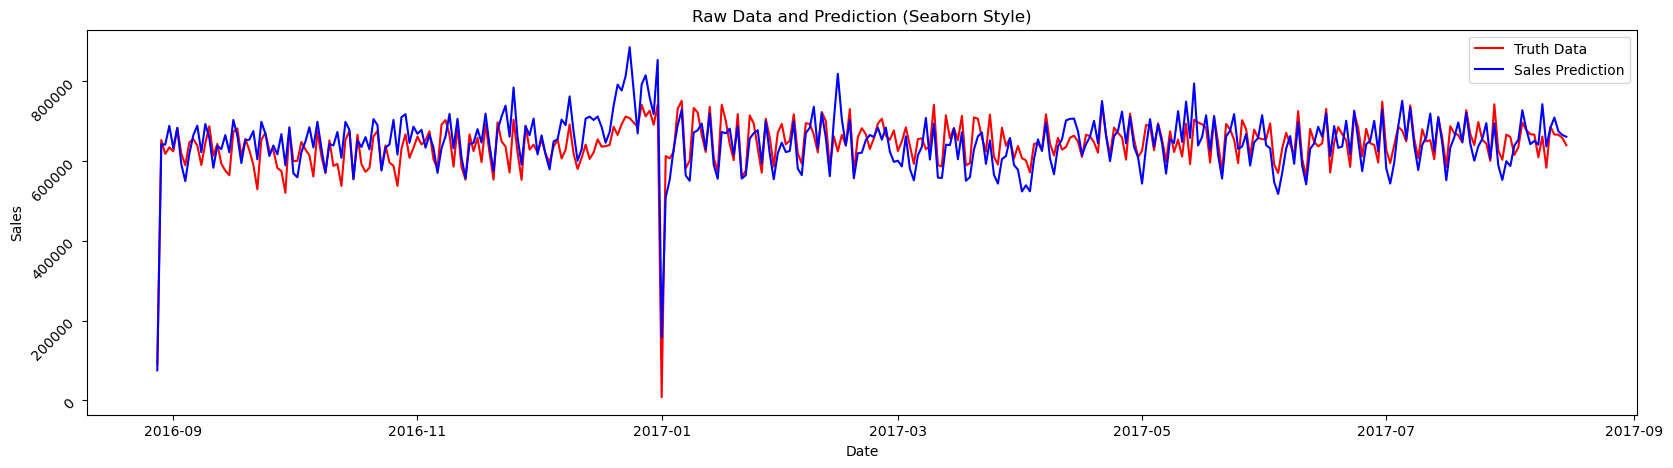

In [241]:
plt.figure(figsize=(20, 5))

# Line plot for sales prediction
sns.lineplot(data=test_result, x='date', y='sales', color='red', label='Truth Data')

# Scatterplot for truth data (sales with dots)
sns.scatterplot(data=test_result, x='date',y='sales prediction',color = 'blue', marker='o', label='Sales Prediction' )

plt.title('Raw Data and Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.yticks(rotation = 45)
plt.legend()
plt.show()

Tahap implementasi model reg xgb pada rill test_data

In [248]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [249]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613816 entries, 2382316 to 3008015
Data columns (total 59 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    613816 non-null  int64  
 1   store_nbr                             613816 non-null  int64  
 2   onpromotion                           613816 non-null  int64  
 3   dcoilwtico                            613816 non-null  float64
 4   transactions                          613816 non-null  float64
 5   type                                  613816 non-null  int64  
 6   cluster                               613816 non-null  int64  
 7   holiday                               613816 non-null  float64
 8   year                                  613816 non-null  int32  
 9   month                                 613816 non-null  int32  
 10  day                                   613816 non-null  int32  
 11

Merging step

In [250]:
merge1_test = pd.merge(test_data, oil_data, on='date', how='left')
merge2_test = pd.merge(merge1_test, transaction_data, on=['date', 'store_nbr'], how='left')
merge3_test = pd.merge(merge2_test, store_data, on='store_nbr', how='left')


In [252]:
# merge national holidays with merge3 to create df for EDA
merge3_test['date'] = pd.to_datetime(merge3_test['date'])
merge4_test = pd.merge(merge3_test, holiday_data, on='date', how='left')
merge4_test.rename(columns={'description' : 'holiday'}, inplace=True)

df_test = merge4_test

In [253]:
df_test['dcoilwtico'] = oil_nulls(df_test['dcoilwtico'])
df_test = date_features(df_test)

In [254]:

df_test['new_family'] = df_test['family'].map(family_map)
df2_test = df_test.drop(columns=['family'])

In [255]:
df2_test = replace_non_null(df2_test)

In [272]:
df3_test = df2_test.copy()

Encoding step

In [273]:
#Manual encoding
df3_test['holiday'] = df3_test['holiday'].replace('yes', 1).replace('no', 0)
df3_test['type'] = df3_test['type'].replace('A', 1).replace('B', 2).replace('C', 3).replace('D', 4).replace('E', 5)
df3_test['new_family'] = df3_test['new_family'].replace('first', 1).replace('second', 2).replace('third', 3).replace('fourth', 4).replace('fifth', 5).replace('sixth', 6).replace('rest', 7)

In [274]:
hot = ['city', 'state', 'day_name'] 
# One-hot encoding
for cat in hot:
    onehots = pd.get_dummies(df3_test[cat], prefix=cat)
    df3_test = df3_test.join(onehots)

# Drop original columns
encode_data_test = df3_test.drop(columns=hot).copy()

# Fill NaN values with 0
encode_data_test.fillna(0, inplace=True)
bool_cols = encode_data_test.select_dtypes(include='bool').columns.tolist()
encode_data_test[bool_cols] = encode_data_test[bool_cols].astype(float)

In [259]:
encode_data_test.shape

(28512, 58)

In [275]:
encode_data_test = create_features(encode_data_test)

In [286]:
FEATURES = ['id','store_nbr', 'onpromotion', 'dcoilwtico',
       'transactions', 'type', 'cluster', 'holiday', 'year', 'month', 'day',
       'new_family', 'city_Ambato', 'city_Babahoyo', 'city_Cayambe',
       'city_Cuenca', 'city_Daule', 'city_El Carmen', 'city_Esmeraldas',
       'city_Guaranda', 'city_Guayaquil', 'city_Ibarra', 'city_Latacunga',
       'city_Libertad', 'city_Loja', 'city_Machala', 'city_Manta',
       'city_Playas', 'city_Puyo', 'city_Quevedo', 'city_Quito',
       'city_Riobamba', 'city_Salinas', 'city_Santo Domingo', 'state_Azuay',
       'state_Bolivar', 'state_Chimborazo', 'state_Cotopaxi', 'state_El Oro',
       'state_Esmeraldas', 'state_Guayas', 'state_Imbabura', 'state_Loja',
       'state_Los Rios', 'state_Manabi', 'state_Pastaza', 'state_Pichincha',
       'state_Santa Elena', 'state_Santo Domingo de los Tsachilas',
       'state_Tungurahua', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday', 'dayofyear', 'dayofmonth']
final_test = encode_data_test[FEATURES]

In [287]:
final_test['sales prediction'] = reg.predict(final_test)

In [291]:
final_test1 = pd.merge(final_test,encode_data_test[['date','id']], how='left',on='id')

In [293]:
final_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id                                    28512 non-null  int64         
 1   store_nbr                             28512 non-null  int64         
 2   onpromotion                           28512 non-null  int64         
 3   dcoilwtico                            28512 non-null  float64       
 4   transactions                          28512 non-null  float64       
 5   type                                  28512 non-null  int64         
 6   cluster                               28512 non-null  int64         
 7   holiday                               28512 non-null  int64         
 8   year                                  28512 non-null  int32         
 9   month                                 28512 non-null  int32         
 10

In [295]:
final_test_result1 = final_test1.groupby('date', as_index = False )['sales prediction'].sum()
# final_test_result2 = final_test.groupby('date', as_index = False )['sales prediction'].sum()
# final_test_result = pd.merge(final_test_result1, final_test_result2, on='date', how='left')

In [296]:
final_test_result1.columns

Index(['date', 'sales prediction'], dtype='object')

In [307]:
final_test_result1.head(1)

,date,sales prediction
0,2017-08-16,393816.90625


In [ ]:
df3['sales'].tail(1)

In [308]:
final_test_result.head(1)

,date,sales,sales prediction
0,2016-08-28,90399.183989,75551.289062


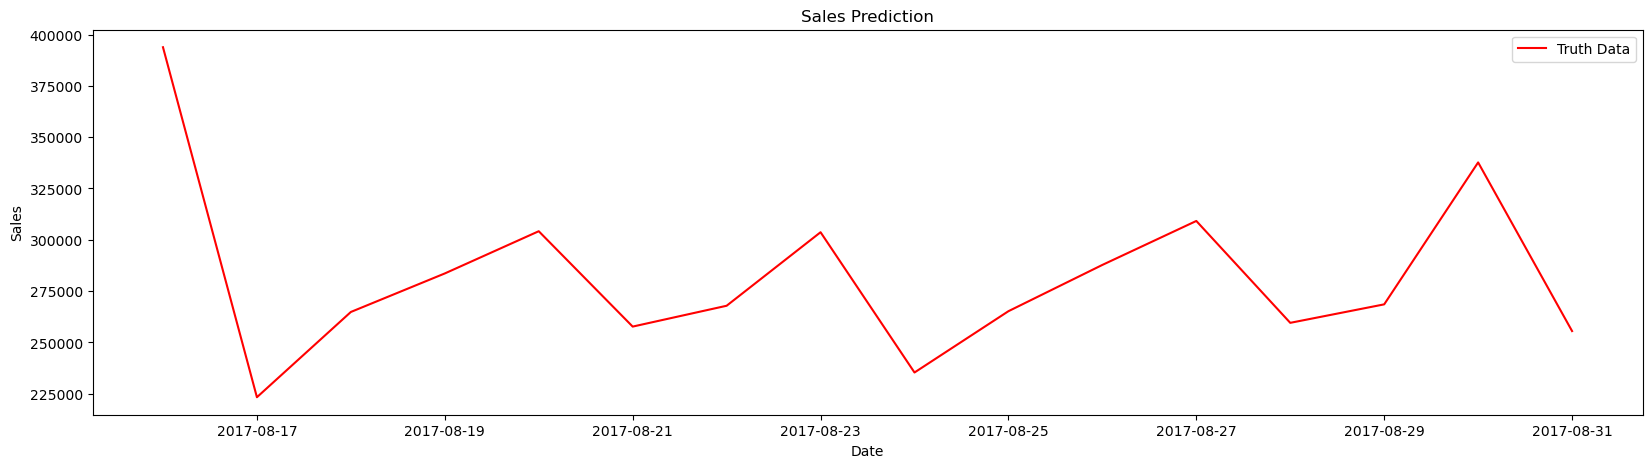

In [297]:
plt.figure(figsize=(20, 5))
# Line plot for sales prediction
sns.lineplot(data=final_test_result1, x='date', y='sales prediction', color='red', label='Truth Data')
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [317]:
df3_test1 = df3.groupby('date', as_index = False )['sales'].sum()

In [319]:
final_test_result1 = final_test_result1.groupby('date', as_index = False )['sales prediction'].sum()

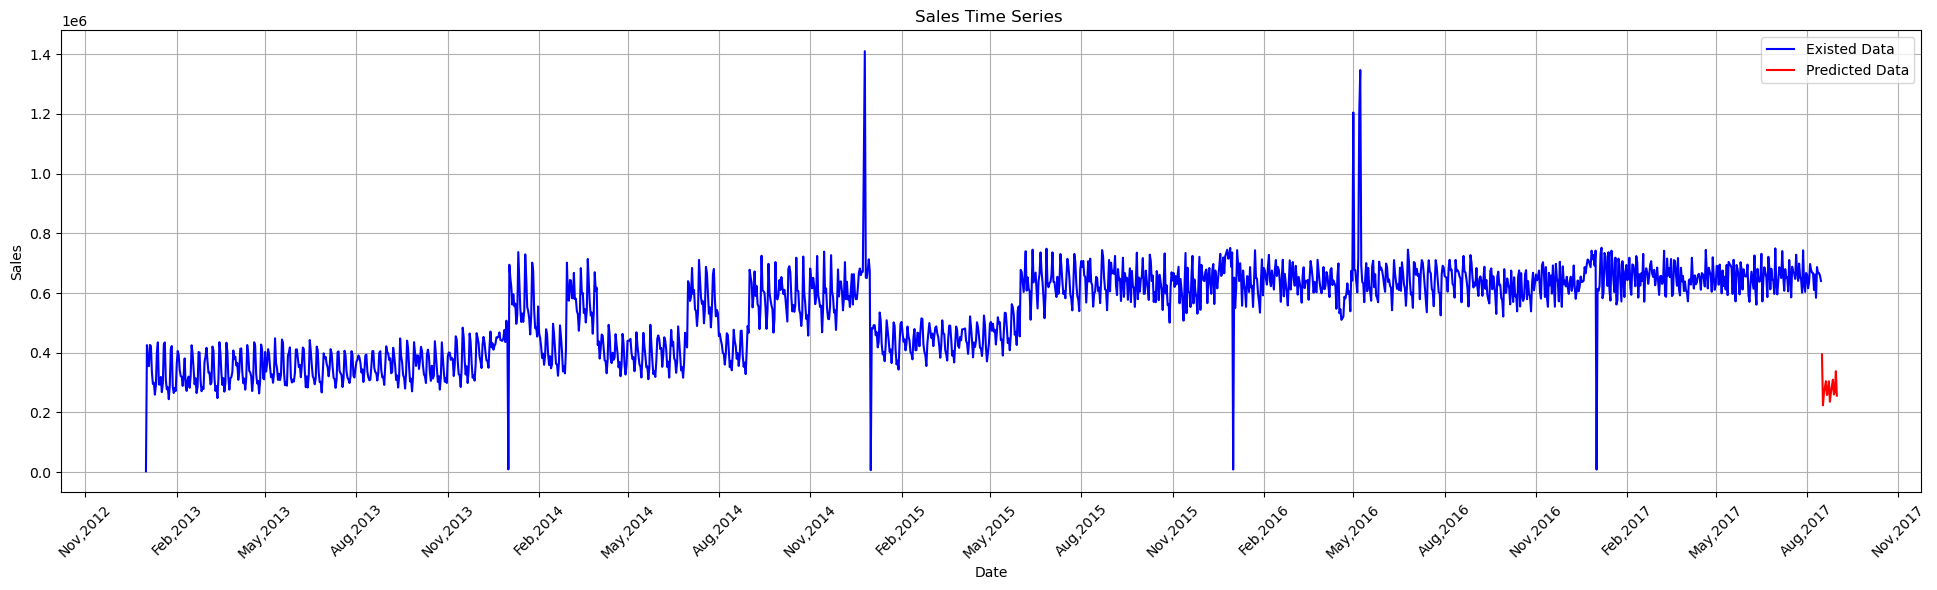

In [320]:
import matplotlib.dates as mdates

# Create the time series plot
fig, ax = plt.subplots(figsize=(24,6))

# Plot df_result
ax.plot(df3_test1['date'], df3_test1['sales'], color='blue', label='Existed Data')

# Plot df_result2 with a different color
ax.plot(final_test_result1['date'], final_test_result1['sales prediction'], color='red', label='Predicted Data')

# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))

# Set the locator to place a tick on each month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series ')

# Add grid, legend, and show the plot
plt.grid(True)
plt.legend()
plt.show()


In [298]:
from sklearn.metrics import mean_squared_log_error

Error antara data asli dengan data prediksi

In [302]:
test['sales prediction'] = test['sales prediction'].clip(lower=0) #ada yg negatif sehingga dijadikan positif

In [303]:
score = np.sqrt(mean_squared_log_error(test['sales'], test['sales prediction']))
print(f'RMSLE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1.44


Phase find the best parameter

In [25]:
myparamGrid = {
    'max_depth': [1, 2, 3, 4, 5],
    'eta': np.arange(0.1, 1.1, 0.1),
    'nrounds': [600, 300, 100]
}


In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613816 entries, 2382316 to 3008015
Data columns (total 59 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    613816 non-null  int64  
 1   store_nbr                             613816 non-null  int64  
 2   onpromotion                           613816 non-null  int64  
 3   dcoilwtico                            613816 non-null  float64
 4   transactions                          613816 non-null  float64
 5   type                                  613816 non-null  int64  
 6   cluster                               613816 non-null  int64  
 7   holiday                               613816 non-null  float64
 8   year                                  613816 non-null  int32  
 9   month                                 613816 non-null  int32  
 10  day                                   613816 non-null  int32  
 11

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
# Initialize the XGBoost regressor
reg1 = xgb.XGBRegressor(objective='reg:linear')

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=reg1,
    param_distributions=myparamGrid,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Choose an appropriate metric
    cv=ShuffleSplit(n_splits=5, test_size=0.3, random_state=42),
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
def my_feature_importance(model):
    fi = pd.DataFrame(data=model.feature_importances_,
                 index=model.feature_names_in_,
                 columns=['importance'])
    fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
    plt.show()

In [ ]:
my_feature_importance(reg1)

In [ ]:
my_feature_importance(reg)

In [ ]:
# X = df3.values
# splits = TimeSeriesSplit(n_splits=3)
# plt.figure(1,figsize = (15,8))
# index = 1
# for train_index, test_index in splits.split(X):
#     train = X[train_index]
#     test = X[test_index]
#     print('Observations: %d' % (len(train) + len(test)))
#     print('Training Observations: %d' % (len(train)))
#     print('Testing Observations: %d' % (len(test)))
#     plt.subplot(310 + index)
#     plt.plot(train)
#     plt.plot([None for i in train] + [x for x in test])
#     index += 1
# plt.show()

In [157]:
# isolate features into X and target into y

from sklearn.model_selection import train_test_split

X, y = df2.drop('sales', axis=1), df2[['sales']]

In [158]:
# convert non-numerical columns into categorical data type

cats = X.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    X[col] = X[col].astype('category')

X.dtypes

id                 int64
date            category
store_nbr          int64
onpromotion        int64
dcoilwtico       float64
transactions     float64
city            category
state           category
type            category
cluster            int64
holiday         category
year               int32
month              int32
day                int32
day_name        category
new_family      category
dtype: object

In [159]:
# split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [160]:
X_train.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
1029554,1029554,2014-08-02,46,0,98.010463,4722.0,Quito,Pichincha,A,14,NaN,2014,8,2,Saturday,rest
1414759,1412977,2015-03-06,54,0,49.610000,847.0,El Carmen,Manabi,C,3,NaN,2015,3,6,Friday,rest
1441006,1439224,2015-03-21,40,0,46.452006,1435.0,Machala,El Oro,C,3,NaN,2015,3,21,Saturday,third
1051182,1051182,2014-08-14,53,0,95.540000,621.0,Manta,Manabi,D,13,NaN,2014,8,14,Thursday,rest
1215053,1215053,2014-11-14,50,0,75.910000,2437.0,Ambato,Tungurahua,A,14,NaN,2014,11,14,Friday,rest


In [162]:
# create regression matrices


import xgboost as xgb

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [163]:
# generating predictions and testing model

from sklearn.metrics import mean_squared_log_error

params = {"objective": "reg:squaredlogerror"}
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
n = 5000

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=250, # every 250 rounds
   early_stopping_rounds=50 # stop the training if validation loss doesn't improve for 50 consecutive rounds
)

preds = model.predict(dtest_reg)

y_test_non_negative = np.maximum(y_test, 0)
preds_non_negative = np.maximum(preds, 0)

rmsle = np.sqrt(mean_squared_log_error(y_test_non_negative, preds_non_negative))
print(f'RMSLE: {rmsle}')

[0]	train-rmsle:3.37438	validation-rmsle:3.37178
[96]	train-rmsle:nan	validation-rmsle:nan
RMSLE: 1.2148889583871971


In [164]:
print(rmsle)

1.2148889583871971


In [180]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [183]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [184]:
oil_data[oil_data['date']=='2017-08-16']

,date,dcoilwtico
1206,2017-08-16,46.8


In [187]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [189]:
oil_data['date'] = pd.to_datetime(oil_data['date'])

In [191]:
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

In [194]:
# prepare test df for evaluation

merge1 = pd.merge(test_data, oil_data, on='date', how='left')
merge2 = pd.merge(merge1, transaction_data, on=['date', 'store_nbr'], how='left')
merge3 = pd.merge(merge2, store_data, on='store_nbr', how='left')

merge4 = pd.merge(merge3, holiday_data, on='date', how='left')
merge4.rename(columns={'description' : 'holiday'}, inplace=True)

test_data1 = merge4

# adding oil prices and date features

test_data1['dcoilwtico'] = oil_nulls(test_data1['dcoilwtico'])
test_data1 = date_features(test_data1)


# replace family

test_data1['new_family'] = test_data1['family'].map(family_map)
test_data1 = test_data1.drop(columns=['family'])

# replace holidays with yes or null

test_data1 = replace_non_null(test_data1)

test_data1.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,3000888,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
1,3000889,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
2,3000890,2017-08-16,1,2,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest
3,3000891,2017-08-16,1,20,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,second
4,3000892,2017-08-16,1,0,46.8,NaN,Quito,Pichincha,D,13,NaN,2017,8,16,Wednesday,rest


In [195]:
# convert non-numerical columns into categorical data type

cats = test_data1.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    test_data1[col] = test_data1[col].astype('category')

In [196]:
# run again on test df

test_data1_matrix = xgb.DMatrix(test_data1, enable_categorical=True)
predictions = model.predict(test_data1_matrix)
test_data1['sales'] = predictions

# change any negative predict ions to zero

test_data1['sales'] = test_data1['sales'].clip(lower=0)

In [197]:
# drop all columns not needed in submission

test_data1_fix = test_data1.drop(columns=['date', 'store_nbr', 'onpromotion', 'dcoilwtico', 'transactions',
       'city', 'state', 'type', 'cluster', 'holiday', 'year', 'month', 'day',
       'day_name', 'new_family'])

test_data1_fix.head()

,id,sales
0,3000888,0.561837
1,3000889,0.561837
2,3000890,19.762249
3,3000891,793.133362
4,3000892,0.561837


In [198]:
test_data1_fix.to_csv('submission.csv', index=False)

In [199]:
df_result = df2.groupby('date', as_index = False )['sales'].sum()
df_result

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,425067.417944
2,2013-01-03,358604.231124
3,2013-01-04,354459.677093
4,2013-01-05,425603.121229
...,...,...
1679,2017-08-11,686541.367022
1680,2017-08-12,666668.772079
1681,2017-08-13,666367.882471
1682,2017-08-14,658090.939081


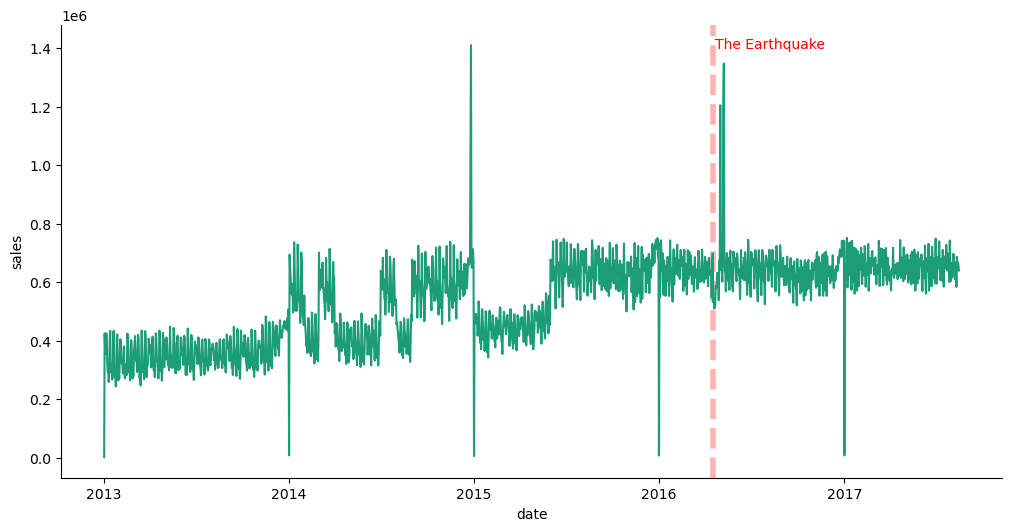

In [200]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=4,alpha=0.3)
  plt.text(pd.Timestamp('2016-04-20'),1400000,'The Earthquake',rotation=360,c='r')
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_result.sort_values('date', ascending=True)
_plot_series(df_sorted, 'Sales by Date')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

In [201]:
df_result2 = test_data1.groupby('date', as_index = False )['sales'].sum()
df_result2

,date,sales
0,2017-08-16,431183.12500
1,2017-08-17,301378.03125
2,2017-08-18,390932.46875
3,2017-08-19,339718.50000
4,2017-08-20,325836.75000
5,2017-08-21,324273.65625
6,2017-08-22,323809.50000
7,2017-08-23,331359.28125
8,2017-08-24,309909.87500
9,2017-08-25,372365.21875


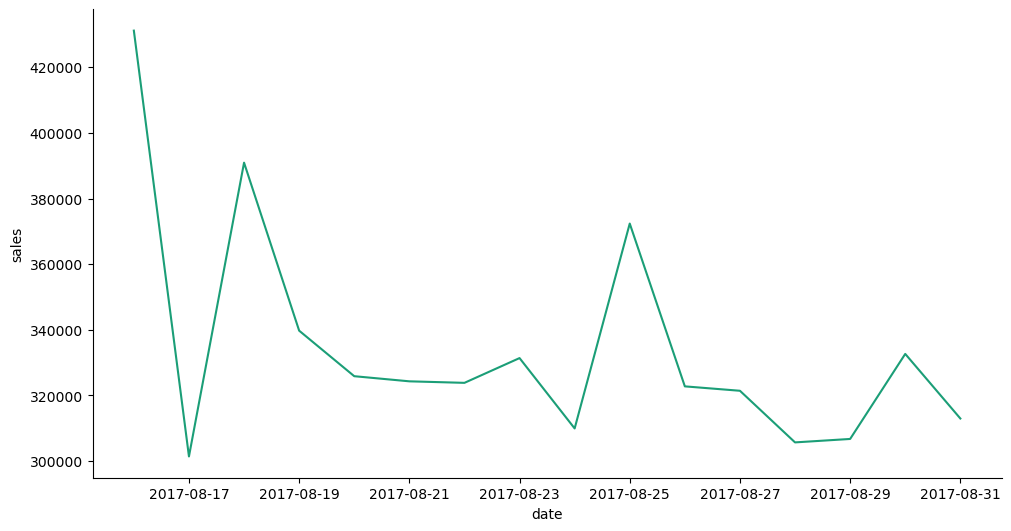

In [202]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_result2.sort_values('date', ascending=True)
_plot_series(df_sorted, 'Predicted Sales by Date')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

In [203]:
df_total = pd.concat([df_result,df_result2])
df_total.head()

,date,sales
0,2013-01-01 00:00:00,2511.618999
1,2013-01-02 00:00:00,425067.417944
2,2013-01-03 00:00:00,358604.231124
3,2013-01-04 00:00:00,354459.677093
4,2013-01-05 00:00:00,425603.121229


In [204]:
df_total.tail()

,date,sales
11,2017-08-27 00:00:00,321393.96875
12,2017-08-28 00:00:00,305657.00000
13,2017-08-29 00:00:00,306705.28125
14,2017-08-30 00:00:00,332630.53125
15,2017-08-31 00:00:00,312939.18750


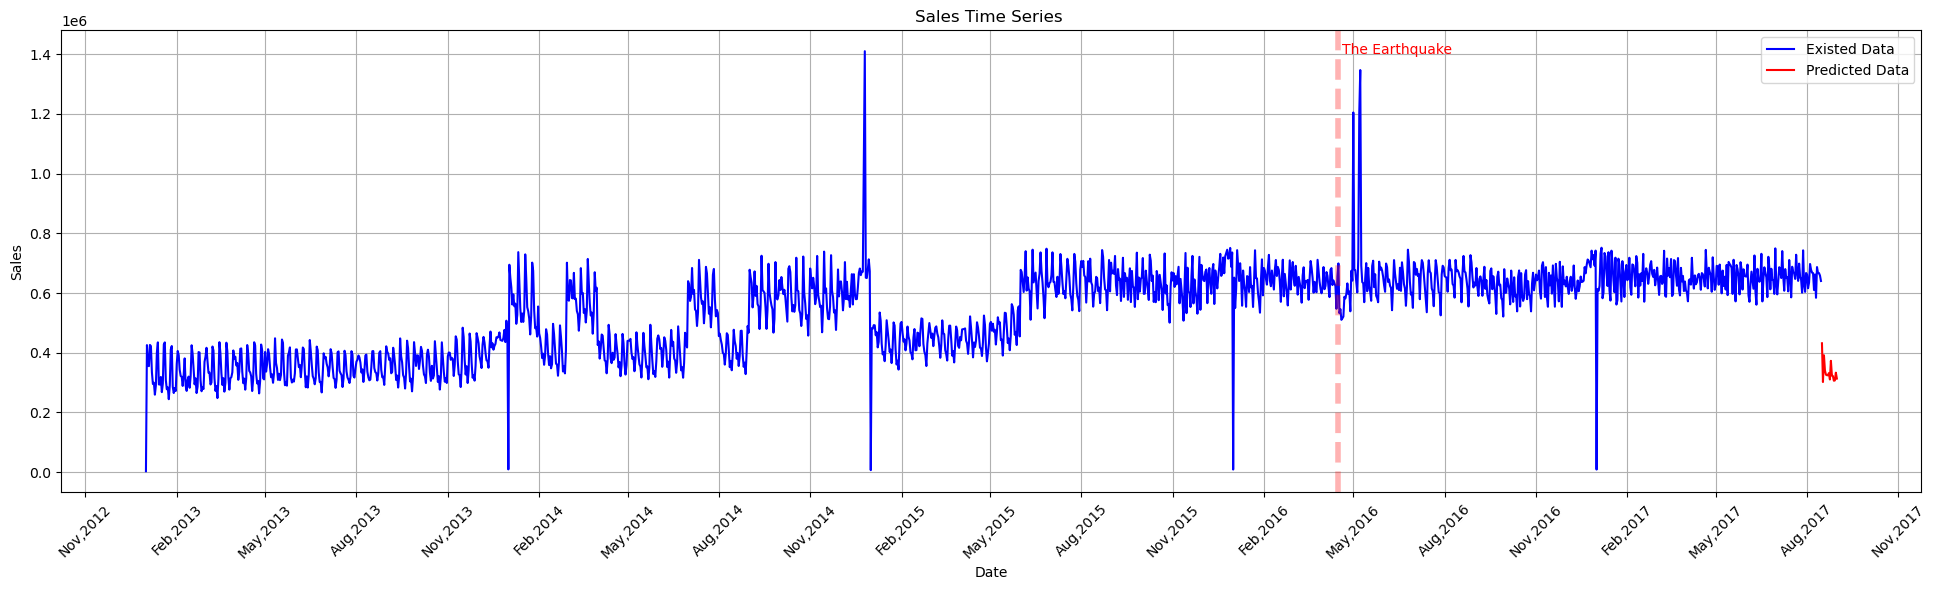

In [205]:
import matplotlib.dates as mdates
# Assuming df_result and df_result2 are already defined and have 'date' and 'sales' columns
df_total = pd.concat([df_result, df_result2])

# Create the time series plot
fig, ax = plt.subplots(figsize=(24,6))

# Plot df_result
ax.plot(df_result['date'], df_result['sales'], color='blue', label='Existed Data')

# Plot df_result2 with a different color
ax.plot(df_result2['date'], df_result2['sales'], color='red', label='Predicted Data')

# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))

# Set the locator to place a tick on each month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series ')

# Add grid, legend, and show the plot
plt.grid(True)
plt.legend()
plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=4,alpha=0.3)
plt.text(pd.Timestamp('2016-04-20'),1400000,'The Earthquake',rotation=360,c='r')
plt.show()


In [208]:
df_result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   date    16 non-null     category
 1   sales   16 non-null     float32 
dtypes: category(1), float32(1)
memory usage: 896.0 bytes


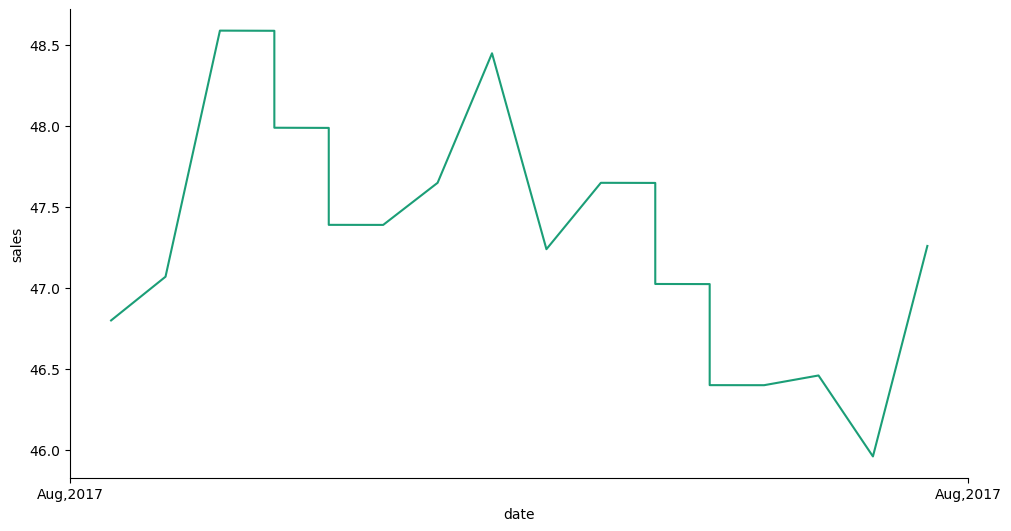

In [209]:

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = df_result2.sort_values('date', ascending=True)

palette = list(sns.palettes.mpl_palette('Dark2'))
xs = test_data1['date']
ys = test_data1['dcoilwtico']
# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))

# Set the locator to place a tick on each month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month
  
plt.plot(xs, ys, label='Oil Price Prediction', color=palette[0 % len(palette)])
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
plt.ylabel('sales')
plt.show()

In [224]:
oil_total = pd.concat([test_data1, df2])
oil_total['date'] = pd.to_datetime(oil_total['date'])
oil_total['year']=oil_total['date'].dt.year
oil_total=oil_total[oil_total['year']>=2013]

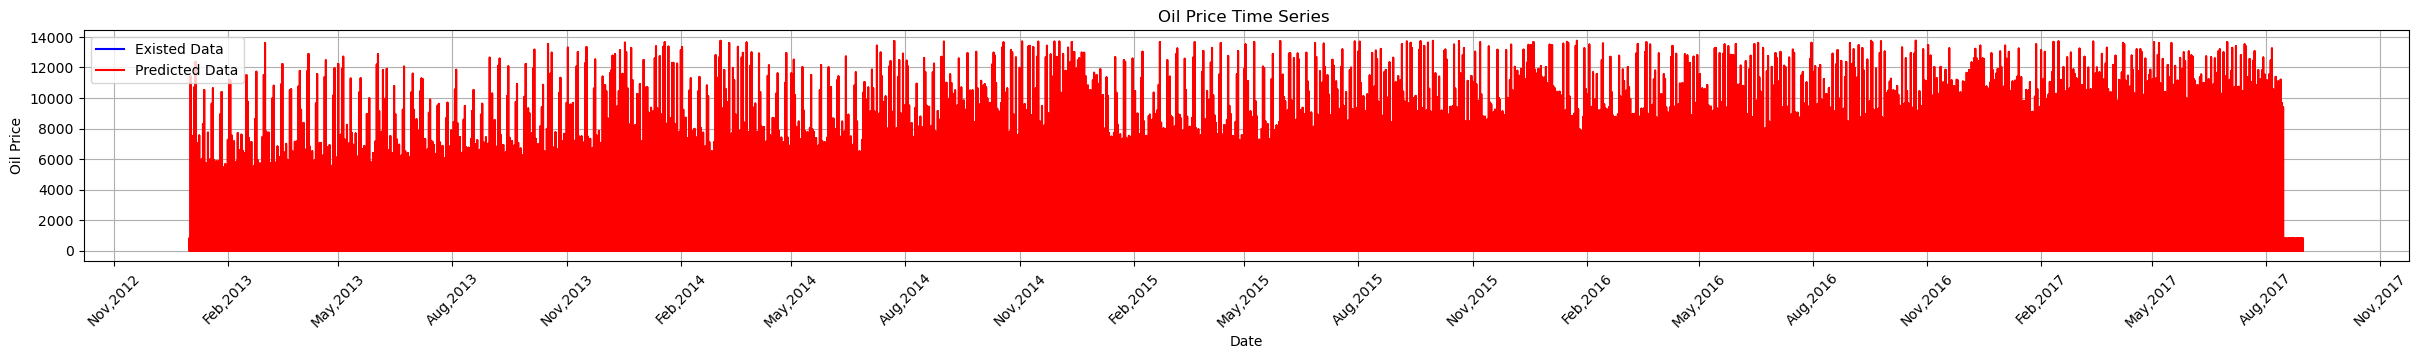

In [225]:
# Assuming df_result and df_result2 are already defined and have 'date' and 'sales' columns

# Create the time series plot
fig, ax = plt.subplots(figsize=(30,3))

# Plot test_data1
ax.plot(oil_total['date'], oil_total['dcoilwtico'], color='blue', label='Existed Data')

# Plot df_result2 with a different color
ax.plot(oil_total['date'], oil_total['sales'], color='red', label='Predicted Data')

# Set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b,%Y'))

# Set the locator to place a tick on each month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # interval=1 ensures a tick every month

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Time Series ')

# Add grid, legend, and show the plot
plt.grid(True)
plt.legend()
#plt.axvline(x=pd.Timestamp('2016-04-16'),color='r',linestyle='--',linewidth=4,alpha=0.3)
#plt.text(pd.Timestamp('2016-04-20'),1400000,'The Earthquake',rotation=360,c='r')
plt.show()


In [218]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
 2   year        1218 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 23.9 KB


Hasil Prediksi model terhadap data asli

In [232]:
df_train = df2.copy()
df_train = df_train.drop(columns=['sales'])
df_train.head()

,id,date,store_nbr,onpromotion,dcoilwtico,transactions,city,state,type,cluster,holiday,year,month,day,day_name,new_family
0,0,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
1,1,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
2,2,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest
3,3,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,second
4,4,2013-01-01,1,0,93.14,NaN,Quito,Pichincha,D,13,yes,2013,1,1,Tuesday,rest


In [233]:
# convert non-numerical columns into categorical data type

cats = df_train.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    df_train[col] = df_train[col].astype('category')

In [234]:
# run again on test df

df_train_matrix = xgb.DMatrix(df_train, enable_categorical=True)
predictions = model.predict(df_train_matrix)
df_train['sales'] = predictions

# change any negative predict ions to zero

df_train['sales'] = df_train['sales'].clip(lower=0)

In [235]:
# drop all columns not needed in submission

df_train_fix = df_train.drop(columns=['store_nbr', 'onpromotion', 'dcoilwtico', 'transactions',
       'city', 'state', 'type', 'cluster', 'holiday', 'year', 'month', 'day',
       'day_name', 'new_family'])

df_train_fix.head()

,id,date,sales
0,0,2013-01-01,0.000000
1,1,2013-01-01,0.000000
2,2,2013-01-01,0.000000
3,3,2013-01-01,3.318943
4,4,2013-01-01,0.000000


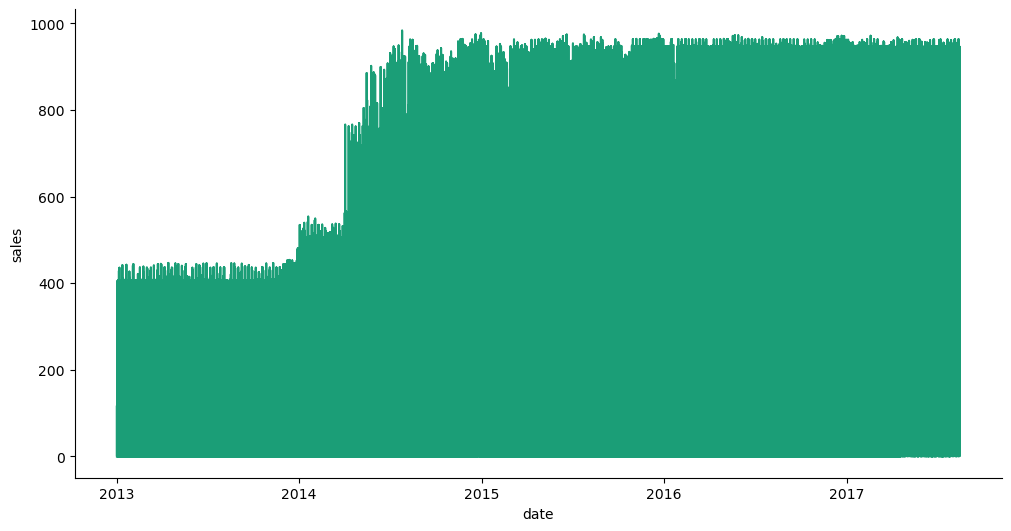

In [236]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_train_fix.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')